In [28]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [29]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

length of X_train

In [30]:
len(X_train)

60000

In [31]:
X_train[0].shape

(28, 28)

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

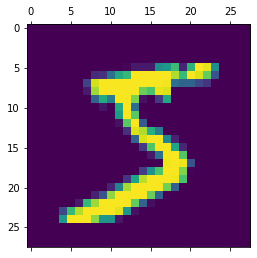

In [33]:
plt.matshow(X_train[0])

In [34]:
y_train[0]

5

In [35]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
# first dimension (60000) is the number of samples we have
# second and third dimension (28, 28) is each individual image 
X_train.shape

(60000, 28, 28)

In [37]:
X_train = X_train / 255
X_test = X_test / 255

### Flattening the X_train dan X_test

In [38]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_train_flattened.shape

(60000, 784)

In [39]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [40]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

"Sequential" means that i have a stack of layers in my neural network. And since it's a stack, it will accpet every layer as one element.

In [41]:
# 10 is output shape 784 is input shape
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

#optimizers allow you to train efficiently. when the backward propagation and the training is going on, optimizer will allow you to reach to global optima 
#loss is loss function

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4700 - accuracy: 0.8766: 1s - loss: 0.8130 - accu - ETA: 1s - loss: 0.6618 - accu - ETA
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9146
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2828 - accuracy: 0.9206: 0s - loss: 0.2835 
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9254


In [42]:
#evaluate accuracy on test data set
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 870us/step - loss: 0.2656 - accuracy: 0.9256


[0.26562735438346863, 0.925599992275238]

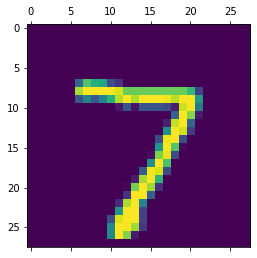

In [43]:
# this is the 0th image data on X_test
plt.matshow(X_test[0])

In [44]:
#sample prediction
y_predicted = model.predict(X_test_flattened)
y_predicted[0] #printing all the scores of predicted output of the 0th data on X_test

array([2.1797508e-02, 4.8918309e-07, 5.5137753e-02, 9.5196366e-01,
       2.4417341e-03, 1.2467587e-01, 1.6261999e-06, 9.9975824e-01,
       8.5550666e-02, 6.6748130e-01], dtype=float32)

In [45]:
#showing the final prediction (hasil prediksi) of the 0th data on X_test
np.argmax(y_predicted[0])

7

### Confusion Matrix

In [46]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [48]:
# labels = true data
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    5,    9,    3,    3,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   3,    7,  931,   16,    8,    5,   12,    9,   36,    5],
       [   1,    0,   22,  915,    1,   34,    2,    9,   18,    8],
       [   1,    1,    3,    1,  918,    0,   12,    3,    9,   34],
       [   7,    3,    3,   26,    6,  794,   14,    4,   28,    7],
       [   9,    3,    9,    1,    7,   19,  905,    2,    3,    0],
       [   1,    7,   23,    7,    9,    1,    0,  941,    3,   36],
       [   4,    9,    7,   20,    9,   38,    9,    9,  861,    8],
       [   9,    7,    1,   10,   30,    9,    0,   17,    6,  920]])>

Text(51.0, 0.5, 'Truth')

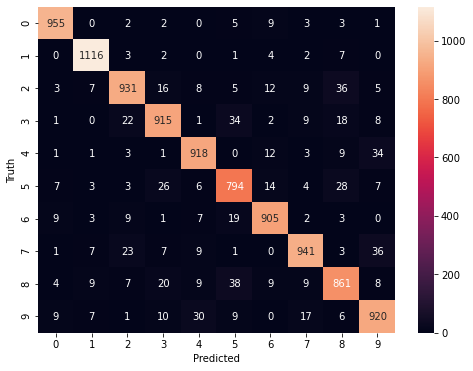

In [49]:
import seaborn as sn
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    # layer pertama ada 200 neuron, jumlah neuron harus < input_shape. jumlah neuron harus cobacoba dulu untuk dapat yang tepat
    keras.layers.Dense(200,input_shape=(784,), activation='relu'),
    #add a hidden layer in order to make the prediction more accurate
    #the hidden layer don't need input_shape, because it can figure out the input shape from previous layer
    keras.layers.Dense(10, activation='sigmoid')
])

#optimizers allow you to train efficiently. when the backward propagation and the training is going on, optimizer will allow you to reach to global optima 
#loss is loss function

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2345 - accuracy: 0.9325
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0990 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0661 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0493 - accuracy: 0.9853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9891


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9775


[0.06915254890918732, 0.9775000214576721]

Text(51.0, 0.5, 'Truth')

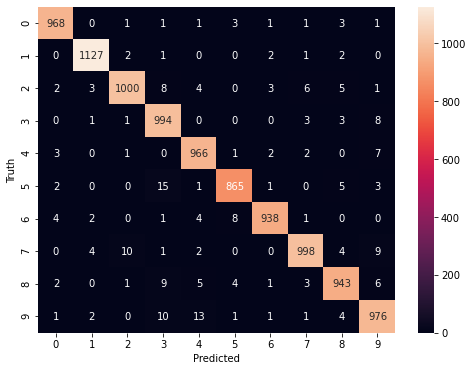

In [52]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (8,6))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Flattening data using Keras

using this method, you won't need to flattened the X_train data manually. Keras is here to help you lazy people <3

In [56]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #in the next layer, you don't need to specify the input_shape because it can figure it out on its own
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#use the X_train data
model.fit(X_train, y_train, epochs=10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2320 - accuracy: 0.9333: 1s - loss: 0.2959  - ETA: 0s - loss: - ETA: 0s - loss: 0.2371 - accuracy: 0.93 - ETA: 0s - loss: 0.2351 - accuracy: 
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0641 - accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0335 - accuracy: 0.9896: 0s - loss: 0.0334 - accura
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0156 - accuracy: 0.9950: 0s - loss: 0.0155 - accuracy: 
Epoch 